# **Ask**

The purpose of the ask phase is to provide insights that will assist in the business task of identifying the differences in bike usage between annual members and casual riders at Cyclistic. The goal is to develop effective marketing strategies that can encourage casual riders to convert into annual members. The marketing director and analysis team have determined that annual memberships are more financially beneficial for the company compared to casual memberships.

To achieve this objective, I will address the following questions:
* On which days do annual members and casual riders tend to ride more frequently?
* Are there any specific months when bike usage is higher for each group?
* How far do annual members and casual riders typically travel on their rides?
* During which time periods do they usually engage in bike rides?
* What is the average duration of rides for both annual members and casual riders?

# **Prepare**

In the prepare phase, ensuring that the data used is unbiased and credible is crucial. It is also essential to understand how the data is generated and collected. In this case, I will analyze the trip data from June 2022 to May 2023, encompassing one year of Cyclistic's bike usage. The trip data is obtained from the  [Motivate International Inc](https://ride.divvybikes.com/data-license-agreement).

To ensure the reliability and credibility of the data, the ROCCC principle is followed:

Reliable: The data is obtained directly from the [Motivate International Inc](https://ride.divvybikes.com/data-license-agreement), a trustworthy and authoritative source.
Original: The data is in its original form and has not been altered or manipulated.
Comprehensive: The data covers a year, providing a comprehensive view of bike usage patterns.
Current: The data is up-to-date and recent, allowing for accurate analysis and decision-making.
Cited: The source of the data, the [Motivate International Inc](https://ride.divvybikes.com/data-license-agreement), is adequately cited to acknowledge its origin and provide transparency.

It is important to note that the data used is publicly available and accessible to anyone interested in studying Cyclistic bike trips. By adhering to these principles, I can ensure that the data used in the analysis is reliable, unbiased, and credible, providing a solid foundation for deriving meaningful insights and making informed marketing decisions.

# **Process**

In the Process phase, it is essential to ensure the data is cleaned and error-free. If any issues or errors are identified, they should be addressed to prepare the data for analysis. In this case, the tools used for data cleaning are Excel and R.

In Excel, three new columns were added: ride_length, hour_of_the_day, and office_hours. The ride_length column was calculated by subtracting the started_at timestamp from the ended_at timestamp, considering negative values that may arise due to data passing midnight.

To determine the hour_of_the_day, the hour component is extracted from the started_at timestamp. Based on the specified time intervals, the following categorization is applied:

* 0:00:00 to 8:59:59 is considered before office hours
* 9:00:00 to 17:59:59 is considered office hours
* 18:00:00 to 23:59:59 is considered after office hours

The office_hours column is populated using these intervals according to the hour_of_the_day data.

By performing these data manipulations and additions in Excel, the dataset becomes cleaner and more structured, with additional columns that provide helpful information for further analysis. Later these cleaned files are exported to R for further analysis.

In [18]:
#Loading Packages and Libraries
library("dplyr")
library("tidyverse")
library("lubridate")
library("readxl")
library("modeest")
library("readr")

After importing the required libraries, the CSV files for each month were read into separate data frames corresponding to their respective months. These individual data frames were then combined vertically (row-wise) into a single data frame called "cyclistic_jun22_may23" using the binding function.

By merging the data frames, we created a comprehensive data set encompassing the trip data from June 2022 to May 2023. This combined data frame provides a unified and consolidated view of Cyclistic bike usage over the entire year.

In [19]:
#Loading data into respective months and combining them
jun <- read.csv("/kaggle/input/cyclistic/202206-divvy-tripdata.csv")
jul <- read.csv("/kaggle/input/cyclistic/202207-divvy-tripdata.csv")
aug <- read.csv("/kaggle/input/cyclistic/202208-divvy-tripdata.csv")
sep <- read.csv("/kaggle/input/cyclistic/202209-divvy-publictripdata.csv")
oct <- read.csv("/kaggle/input/cyclistic/202210-divvy-tripdata.csv")
nov <- read.csv("/kaggle/input/cyclistic/202211-divvy-tripdata.csv")
dec <- read.csv("/kaggle/input/cyclistic/202212-divvy-tripdata.csv")
jan <- read.csv("/kaggle/input/cyclistic/202301-divvy-tripdata.csv")
feb <- read.csv("/kaggle/input/cyclistic/202302-divvy-tripdata.csv")
mar <- read.csv("/kaggle/input/cyclistic/202303-divvy-tripdata.csv")
apr <- read.csv("/kaggle/input/cyclistic/202304-divvy-tripdata.csv")
may <- read.csv("/kaggle/input/cyclistic/202305-divvy-tripdata.csv")
cyclistic_jun22_may23 <- rbind(jun, jul, aug, sep, oct, nov, dec, jan, feb, mar, apr, may)

Next, I examined the structure of the newly created data frame, "cyclistic_jun2022_may2023," in order to gain a better understanding of its composition.

In [20]:
View(cyclistic_jun22_may23)
str(cyclistic_jun22_may23)

ride_id,rideable_type,started_at,ended_at,ride_length,hour_of_day,office_hours,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
600CFD130D0FD2A4,electric_bike,6/30/22 17:27,6/30/22 17:35,0:07:22,17,Office Hours,,,,,41.89,-87.62,41.91,-87.62,casual
F5E6B5C1682C6464,electric_bike,6/30/22 18:39,6/30/22 18:47,0:07:36,18,After Hours,,,,,41.91,-87.62,41.93,-87.63,casual
B6EB6D27BAD771D2,electric_bike,6/30/22 11:49,6/30/22 12:02,0:13:29,11,Office Hours,,,,,41.91,-87.65,41.89,-87.61,casual
C9C320375DE1D5C6,electric_bike,6/30/22 11:15,6/30/22 11:19,0:04:18,11,Office Hours,,,,,41.80,-87.66,41.80,-87.65,casual
56C055851023BE98,electric_bike,6/29/22 23:36,6/29/22 23:45,0:08:27,23,After Hours,,,,,41.91,-87.63,41.93,-87.64,casual
B664188E8163D045,electric_bike,6/30/22 16:42,6/30/22 16:58,0:16:12,16,Office Hours,,,,,42.03,-87.71,42.06,-87.73,casual
338C05A3E90D619B,electric_bike,6/30/22 18:39,6/30/22 19:05,0:25:55,18,After Hours,,,,,41.91,-87.63,41.92,-87.72,casual
C037F5F4107788DE,electric_bike,6/30/22 12:46,6/30/22 14:12,1:26:34,12,Office Hours,,,,,41.89,-87.62,41.98,-87.67,casual
C19B08D794D1C89E,electric_bike,6/30/22 11:09,6/30/22 11:10,0:00:47,11,Office Hours,,,,,41.89,-87.61,41.89,-87.61,casual


'data.frame':	5829030 obs. of  16 variables:
 $ ride_id           : chr  "600CFD130D0FD2A4" "F5E6B5C1682C6464" "B6EB6D27BAD771D2" "C9C320375DE1D5C6" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "6/30/22 17:27" "6/30/22 18:39" "6/30/22 11:49" "6/30/22 11:15" ...
 $ ended_at          : chr  "6/30/22 17:35" "6/30/22 18:47" "6/30/22 12:02" "6/30/22 11:19" ...
 $ ride_length       : chr  "0:07:22" "0:07:36" "0:13:29" "0:04:18" ...
 $ hour_of_day       : int  17 18 11 11 23 16 18 12 11 11 ...
 $ office_hours      : chr  "Office Hours" "After Hours" "Office Hours" "Office Hours" ...
 $ start_station_name: chr  "" "" "" "" ...
 $ start_station_id  : chr  "" "" "" "" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ end_station_id    : chr  "" "" "" "" ...
 $ start_lat         : num  41.9 41.9 41.9 41.8 41.9 ...
 $ start_lng         : num  -87.6 -87.6 -87.7 -87.7 -87.6 ...
 $ end_lat           : num  41.9 41.9 4

Now I am equipped with sufficient information about the data frame, I proceed with the data cleaning process in R. This involves carrying out additional transformations and applying filters to refine the data set. Here are the steps taken using R:

* Conversion of ride_length format: The ride_length column is converted to the difftime format, which allows for more convenient handling of time durations.
* Extraction of start_date and end_date: The started_at and ended_at columns are used to extract the date component only, excluding the time information. This is done to facilitate further analysis based on dates.
* Extraction of month, day, year, and weekday: From the start_date, the month, day, year, and weekday are extracted as separate columns. These additional columns provide more granular information about each ride and can be used for specific analyses.
* Removal of unnecessary items: Any columns or variables irrelevant to the current analysis are removed from the dataset. This step helps streamline the data and focus on the key variables of interest.
* Omission of missing values: Any rows or observations with missing values are omitted from the dataset. This ensures that the analysis is conducted on complete and reliable data.

By implementing these operations in R, the dataset undergoes further refinement, resulting in a more streamlined and focused dataset for analysis, excluding any incomplete or irrelevant data points.

In [21]:
cyclistic_jun22_may23$ride_length <- as.difftime(cyclistic_jun22_may23$ride_length, units=c("mins"))
cyclistic_jun22_may23$start_date <- as.Date(mdy_hm(cyclistic_jun22_may23$started_at))
cyclistic_jun22_may23$end_date <- as.Date(mdy_hm(cyclistic_jun22_may23$ended_at))
cyclistic_jun22_may23$month <- format(as.Date(cyclistic_jun22_may23$start_date),"%m")
cyclistic_jun22_may23$day <- format(as.Date(cyclistic_jun22_may23$start_date),"%d")
cyclistic_jun22_may23$year <- format(as.Date(cyclistic_jun22_may23$start_date),"%Y")
cyclistic_jun22_may23$day_of_week <- format(as.Date(cyclistic_jun22_may23$start_date),"%A")
cyclistic_jun22_may23$day_of_week <- ordered(cyclistic_jun22_may23$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
cyclistic_jun22_may23 <- cyclistic_jun22_may23 %>%
select(-c(started_at, ended_at, start_station_id, end_station_id,start_station_name,end_station_name)) %>%
na.omit(cyclistic_jun22_may23)

After completing the additional cleaning steps, I again viewed the dataset to verify that it aligned with the intended structure and content. This thorough review allows me to confirm that the data is per the planned analysis, ensuring that all variables are appropriately formatted, relevant observations are retained, and any extraneous or erroneous data is removed.

In [22]:
View(cyclistic_jun22_may23)
str(cyclistic_jun22_may23)

,ride_id,rideable_type,ride_length,hour_of_day,office_hours,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,end_date,month,day,year,day_of_week
,<chr>,<chr>,<drtn>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<ord>
1,600CFD130D0FD2A4,electric_bike,7.3666667 mins,17,Office Hours,41.89,-87.62,41.91,-87.62,casual,2022-06-30,2022-06-30,06,30,2022,Thursday
2,F5E6B5C1682C6464,electric_bike,7.6000000 mins,18,After Hours,41.91,-87.62,41.93,-87.63,casual,2022-06-30,2022-06-30,06,30,2022,Thursday
3,B6EB6D27BAD771D2,electric_bike,13.4833333 mins,11,Office Hours,41.91,-87.65,41.89,-87.61,casual,2022-06-30,2022-06-30,06,30,2022,Thursday
4,C9C320375DE1D5C6,electric_bike,4.3000000 mins,11,Office Hours,41.80,-87.66,41.80,-87.65,casual,2022-06-30,2022-06-30,06,30,2022,Thursday
5,56C055851023BE98,electric_bike,8.4500000 mins,23,After Hours,41.91,-87.63,41.93,-87.64,casual,2022-06-29,2022-06-29,06,29,2022,Wednesday
6,B664188E8163D045,electric_bike,16.2000000 mins,16,Office Hours,42.03,-87.71,42.06,-87.73,casual,2022-06-30,2022-06-30,06,30,2022,Thursday
7,338C05A3E90D619B,electric_bike,25.9166667 mins,18,After Hours,41.91,-87.63,41.92,-87.72,casual,2022-06-30,2022-06-30,06,30,2022,Thursday
8,C037F5F4107788DE,electric_bike,86.5666667 mins,12,Office Hours,41.89,-87.62,41.98,-87.67,casual,2022-06-30,2022-06-30,06,30,2022,Thursday
9,C19B08D794D1C89E,electric_bike,0.7833333 mins,11,Office Hours,41.89,-87.61,41.89,-87.61,casual,2022-06-30,2022-06-30,06,30,2022,Thursday


'data.frame':	5822942 obs. of  16 variables:
 $ ride_id      : chr  "600CFD130D0FD2A4" "F5E6B5C1682C6464" "B6EB6D27BAD771D2" "C9C320375DE1D5C6" ...
 $ rideable_type: chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ ride_length  : 'difftime' num  7.36666666666667 7.6 13.4833333333333 4.3 ...
  ..- attr(*, "units")= chr "mins"
 $ hour_of_day  : int  17 18 11 11 23 16 18 12 11 11 ...
 $ office_hours : chr  "Office Hours" "After Hours" "Office Hours" "Office Hours" ...
 $ start_lat    : num  41.9 41.9 41.9 41.8 41.9 ...
 $ start_lng    : num  -87.6 -87.6 -87.7 -87.7 -87.6 ...
 $ end_lat      : num  41.9 41.9 41.9 41.8 41.9 ...
 $ end_lng      : num  -87.6 -87.6 -87.6 -87.7 -87.6 ...
 $ member_casual: chr  "casual" "casual" "casual" "casual" ...
 $ start_date   : Date, format: "2022-06-30" "2022-06-30" ...
 $ end_date     : Date, format: "2022-06-30" "2022-06-30" ...
 $ month        : chr  "06" "06" "06" "06" ...
 $ day          : chr  "30" "30" "30" "30" ...
 $ y

# **Analyze**

During the analysis phase, the cleaned data is examined to gain insights into the behaviors and characteristics of casual riders compared to annual members. The goal is to draw data-driven conclusions that can be presented to stakeholders. 

In [23]:
summary(cyclistic_jun22_may23)

   ride_id          rideable_type      ride_length        hour_of_day   
 Length:5822942     Length:5822942     Length:5822942    Min.   : 0.00  
 Class :character   Class :character   Class :difftime   1st Qu.:11.00  
 Mode  :character   Mode  :character   Mode  :numeric    Median :15.00  
                                                         Mean   :14.19  
                                                         3rd Qu.:18.00  
                                                         Max.   :23.00  
                                                                        
 office_hours         start_lat       start_lng         end_lat     
 Length:5822942     Min.   :41.64   Min.   :-87.87   Min.   : 0.00  
 Class :character   1st Qu.:41.88   1st Qu.:-87.66   1st Qu.:41.88  
 Mode  :character   Median :41.90   Median :-87.64   Median :41.90  
                    Mean   :41.90   Mean   :-87.65   Mean   :41.90  
                    3rd Qu.:41.93   3rd Qu.:-87.63   3rd Qu.:41.93  
  

I checked the Average ride duration: The data is analyzed to determine the average duration of rides for all riders, irrespective of their membership type. This provides an overall understanding of the typical ride duration across the dataset.


In [24]:
mean(cyclistic_jun22_may23$end_date - cyclistic_jun22_may23$start_date)

Time difference of 0.00452881 days

Aggregation by ride frequency Vs membership type: The data is further examined by aggregating it based on the frequency of rides and the membership type. This analysis allows a deeper understanding of the differences between casual riders and annual members.

In [25]:
aggregate(cyclistic_jun22_may23$ride_length ~ cyclistic_jun22_may23$member_casual, FUN = mean)
aggregate(cyclistic_jun22_may23$ride_length ~ cyclistic_jun22_may23$member_casual, FUN = median)
aggregate(cyclistic_jun22_may23$ride_length ~ cyclistic_jun22_may23$member_casual, FUN = max)
aggregate(cyclistic_jun22_may23$ride_length ~ cyclistic_jun22_may23$member_casual, FUN = min)
aggregate(cyclistic_jun22_may23$ride_length ~ cyclistic_jun22_may23$office_hours, FUN = min)
aggregate(cyclistic_jun22_may23$ride_length ~ cyclistic_jun22_may23$office_hours, FUN = mean)
aggregate(cyclistic_jun22_may23$ride_length ~ cyclistic_jun22_may23$office_hours, FUN = median)
aggregate(cyclistic_jun22_may23$ride_length ~ cyclistic_jun22_may23$office_hours, FUN = max)

cyclistic_jun22_may23$member_casual,cyclistic_jun22_may23$ride_length
<chr>,<drtn>
casual,20.72013 mins
member,12.15874 mins


cyclistic_jun22_may23$member_casual,cyclistic_jun22_may23$ride_length
<chr>,<drtn>
casual,12.216667 mins
member,8.616667 mins


cyclistic_jun22_may23$member_casual,cyclistic_jun22_may23$ride_length
<chr>,<drtn>
casual,1439.983 mins
member,1439.983 mins


cyclistic_jun22_may23$member_casual,cyclistic_jun22_may23$ride_length
<chr>,<drtn>
casual,0 mins
member,0 mins


cyclistic_jun22_may23$office_hours,cyclistic_jun22_may23$ride_length
<chr>,<drtn>
After Hours,0 mins
Before Hours,0 mins
Office Hours,0 mins


cyclistic_jun22_may23$office_hours,cyclistic_jun22_may23$ride_length
<chr>,<drtn>
After Hours,15.19430 mins
Before Hours,12.62669 mins
Office Hours,16.52845 mins


cyclistic_jun22_may23$office_hours,cyclistic_jun22_may23$ride_length
<chr>,<drtn>
After Hours,10.05 mins
Before Hours,8.45 mins
Office Hours,10.20 mins


cyclistic_jun22_may23$office_hours,cyclistic_jun22_may23$ride_length
<chr>,<drtn>
After Hours,1439.983 mins
Before Hours,1439.950 mins
Office Hours,1439.983 mins


Aggregation by ride frequency Vs membership type and weekday: To gain deeper insights into the differences between casual riders and annual members in terms of their bike usage patterns on different days of the week, the data is aggregated based on ride frequency, membership type, and weekday.

In [26]:
aggregate(cyclistic_jun22_may23$ride_length ~ cyclistic_jun22_may23$member_casual + cyclistic_jun22_may23$day_of_week, FUN = mean)

cyclistic_jun22_may23$member_casual,cyclistic_jun22_may23$day_of_week,cyclistic_jun22_may23$ride_length
<chr>,<ord>,<drtn>
casual,Sunday,24.02813 mins
member,Sunday,13.53257 mins
casual,Monday,20.54610 mins
member,Monday,11.53879 mins
casual,Tuesday,18.62521 mins
member,Tuesday,11.66749 mins
casual,Wednesday,17.95224 mins
member,Wednesday,11.63883 mins
casual,Thursday,18.48515 mins


Aggregation by ride frequency Vs membership type, weekday and office hours: To delve deeper into the analysis, the data was further aggregated by considering office hours to determine when casual riders and annual members use the bikes the most. By aggregating the data based on office hours, we aim to identify the specific time slots during which bike usage is highest for each group.

In [27]:
aggregate(cyclistic_jun22_may23$ride_length ~ cyclistic_jun22_may23$member_casual + cyclistic_jun22_may23$office_hours + cyclistic_jun22_may23$day_of_week, FUN = mean)
aggregate(cyclistic_jun22_may23$ride_length ~ cyclistic_jun22_may23$member_casual + cyclistic_jun22_may23$office_hours + cyclistic_jun22_may23$day_of_week, FUN = median)
aggregate(cyclistic_jun22_may23$ride_length ~ cyclistic_jun22_may23$member_casual + cyclistic_jun22_may23$office_hours + cyclistic_jun22_may23$day_of_week, FUN = max)
aggregate(cyclistic_jun22_may23$ride_length ~ cyclistic_jun22_may23$member_casual + cyclistic_jun22_may23$office_hours + cyclistic_jun22_may23$day_of_week, FUN = min)

cyclistic_jun22_may23$member_casual,cyclistic_jun22_may23$office_hours,cyclistic_jun22_may23$day_of_week,cyclistic_jun22_may23$ride_length
<chr>,<chr>,<ord>,<drtn>
casual,After Hours,Sunday,21.83419 mins
member,After Hours,Sunday,12.69515 mins
casual,Before Hours,Sunday,20.70038 mins
member,Before Hours,Sunday,12.83841 mins
casual,Office Hours,Sunday,25.44383 mins
member,Office Hours,Sunday,13.95817 mins
casual,After Hours,Monday,18.37675 mins
member,After Hours,Monday,11.72726 mins
casual,Before Hours,Monday,15.31818 mins


cyclistic_jun22_may23$member_casual,cyclistic_jun22_may23$office_hours,cyclistic_jun22_may23$day_of_week,cyclistic_jun22_may23$ride_length
<chr>,<chr>,<ord>,<drtn>
casual,After Hours,Sunday,12.683333 mins
member,After Hours,Sunday,8.833333 mins
casual,Before Hours,Sunday,11.000000 mins
member,Before Hours,Sunday,8.483333 mins
casual,Office Hours,Sunday,15.700000 mins
member,Office Hours,Sunday,9.666667 mins
casual,After Hours,Monday,11.083333 mins
member,After Hours,Monday,8.366667 mins
casual,Before Hours,Monday,8.716667 mins


cyclistic_jun22_may23$member_casual,cyclistic_jun22_may23$office_hours,cyclistic_jun22_may23$day_of_week,cyclistic_jun22_may23$ride_length
<chr>,<chr>,<ord>,<drtn>
casual,After Hours,Sunday,1386.3833 mins
member,After Hours,Sunday,1439.8667 mins
casual,Before Hours,Sunday,1439.9500 mins
member,Before Hours,Sunday,1415.3833 mins
casual,Office Hours,Sunday,1439.8167 mins
member,Office Hours,Sunday,1423.7833 mins
casual,After Hours,Monday,1439.7000 mins
member,After Hours,Monday,1402.9500 mins
casual,Before Hours,Monday,1400.5333 mins


cyclistic_jun22_may23$member_casual,cyclistic_jun22_may23$office_hours,cyclistic_jun22_may23$day_of_week,cyclistic_jun22_may23$ride_length
<chr>,<chr>,<ord>,<drtn>
casual,After Hours,Sunday,0.00000000 mins
member,After Hours,Sunday,0.00000000 mins
casual,Before Hours,Sunday,0.00000000 mins
member,Before Hours,Sunday,0.00000000 mins
casual,Office Hours,Sunday,0.00000000 mins
member,Office Hours,Sunday,0.00000000 mins
casual,After Hours,Monday,0.00000000 mins
member,After Hours,Monday,0.00000000 mins
casual,Before Hours,Monday,0.01666667 mins


To gain a better understanding of the relationship between membership status (casual or annual) and ride duration in relation to the days of the week, the data is arranged and analyzed accordingly.

In [28]:
cyclistic_jun22_may23 %>%
mutate(weekday = wday(start_date, label = TRUE)) %>%
group_by(member_casual, weekday) %>%
summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>%
arrange(member_casual, weekday)
count(cyclistic_jun22_may23, "ride_id")

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<drtn>
casual,Sun,374634,24.02813 mins
casual,Mon,257229,20.54610 mins
casual,Tue,270389,18.62521 mins
casual,Wed,291317,17.95224 mins
casual,Thu,312735,18.48515 mins
casual,Fri,345773,19.91146 mins
casual,Sat,454699,23.26428 mins
member,Sun,394451,13.53257 mins
member,Mon,471295,11.53879 mins


"""ride_id""",n
<chr>,<int>
ride_id,5822942


Upon analyzing the data, a noteworthy observation is that the average ride duration for both members and casual riders is highest on weekends, specifically on Saturdays and Sundays. This suggests that riders, regardless of their membership status, tend to engage in longer rides during their leisure time on weekends.

Additionally, a significant finding emerges when comparing the average ride duration between casual riders and members. The average duration for casual riders consistently exceeds that of members across all days of the week. This disparity in duration indicates that casual riders are more inclined to use their bike rides for leisure purposes, such as exploring the city, sightseeing, or enjoying recreational activities. On the other hand, members likely utilize their rides for more practical purposes, such as commuting to work or engaging in regular routines.

# **Share**

In the Share phase, the findings from the analysis phase are communicated effectively using visualizations. In this case, Tableau was utilized to create visuals based on the analyzed data. Here are some key observations:

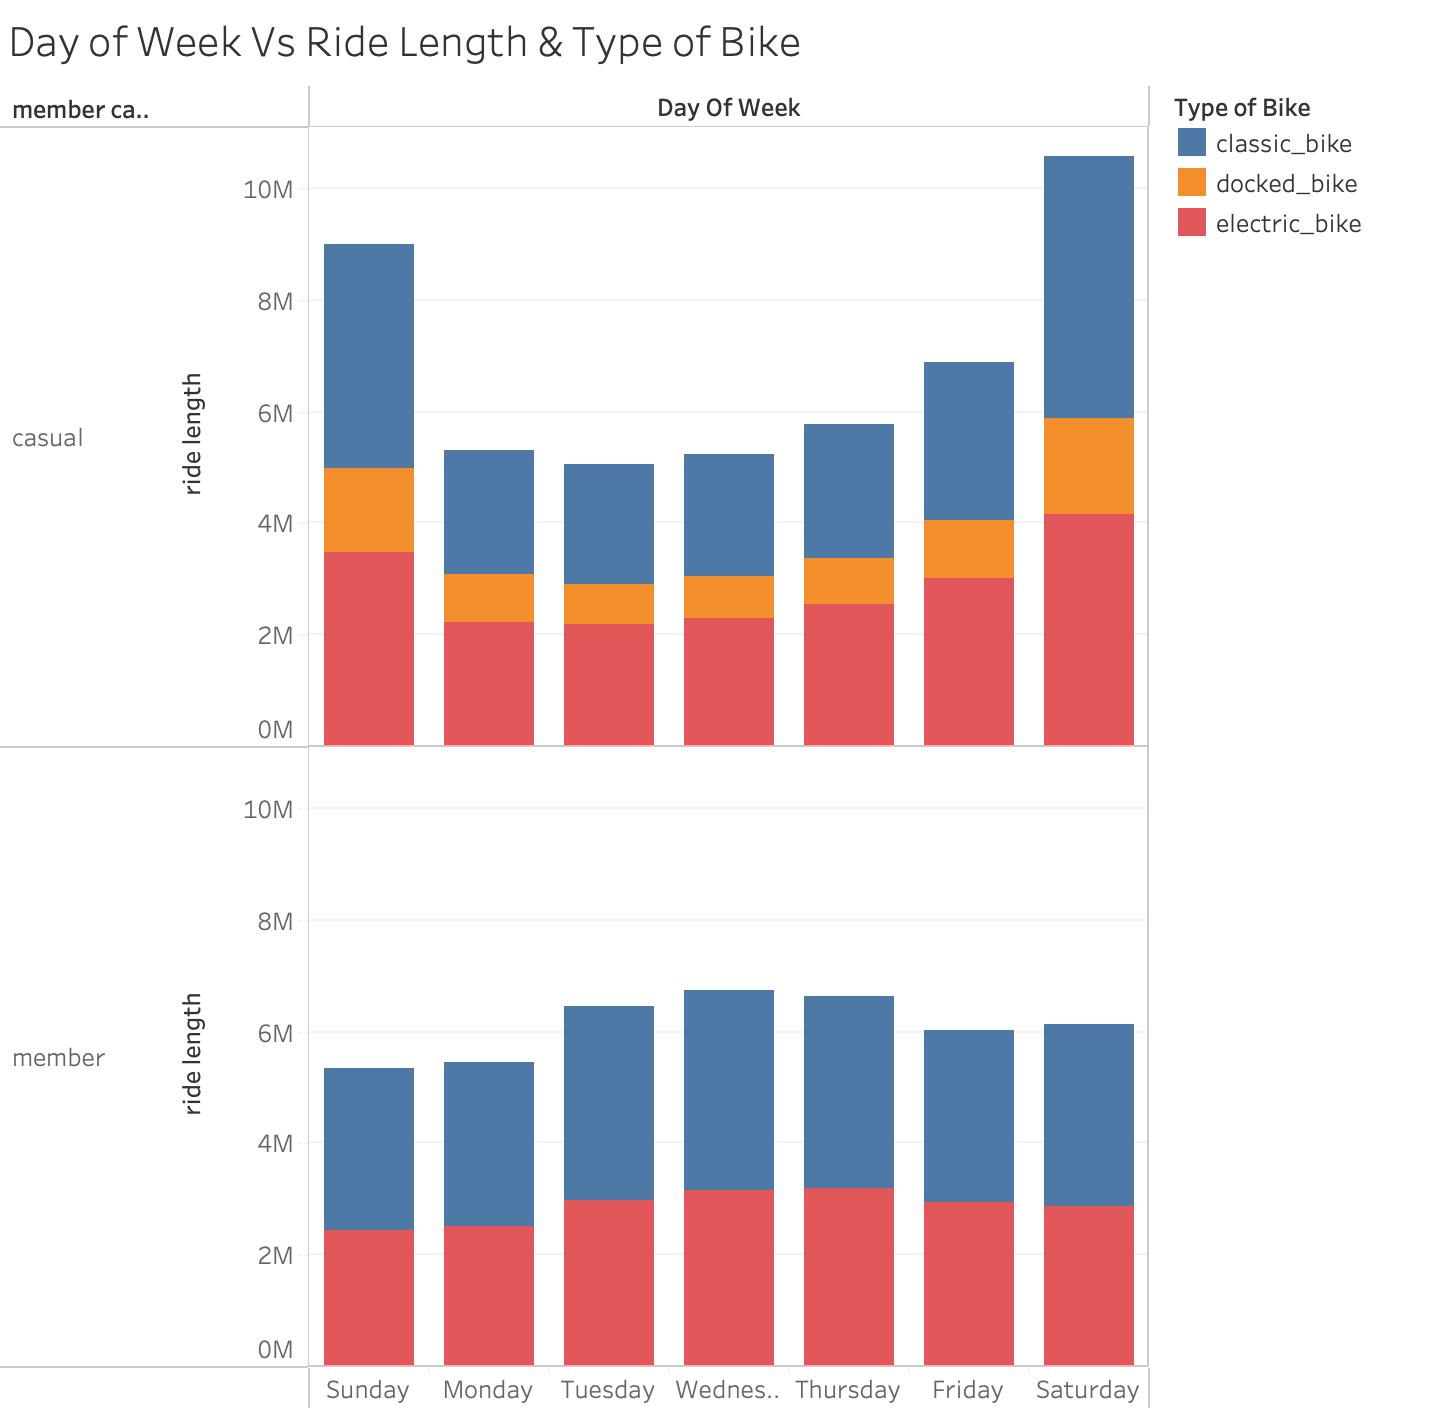


The analysis of the chart reveals exciting patterns and differences between annual members and casual riders:

* Ride Lengths: Annual members tend to have consistent ride lengths throughout the week, suggesting they use the bikes for work-related purposes. This consistency implies that their rides are likely for regular commuting or daily routines. On the other hand, casual riders exhibit varying ride lengths between weekdays and weekends. This indicates that they use the bikes more on weekends, possibly for leisure or recreation purposes, resulting in longer rides.
* Bike Preference: The chart also highlights a disparity in bike preference between the two groups. Annual members primarily use docked bikes, while casual riders prefer dockless bikes. This preference may stem from the convenience and flexibility of dockless bikes, which allows casual riders to access and return bikes at various locations, suiting their diverse needs and activities.

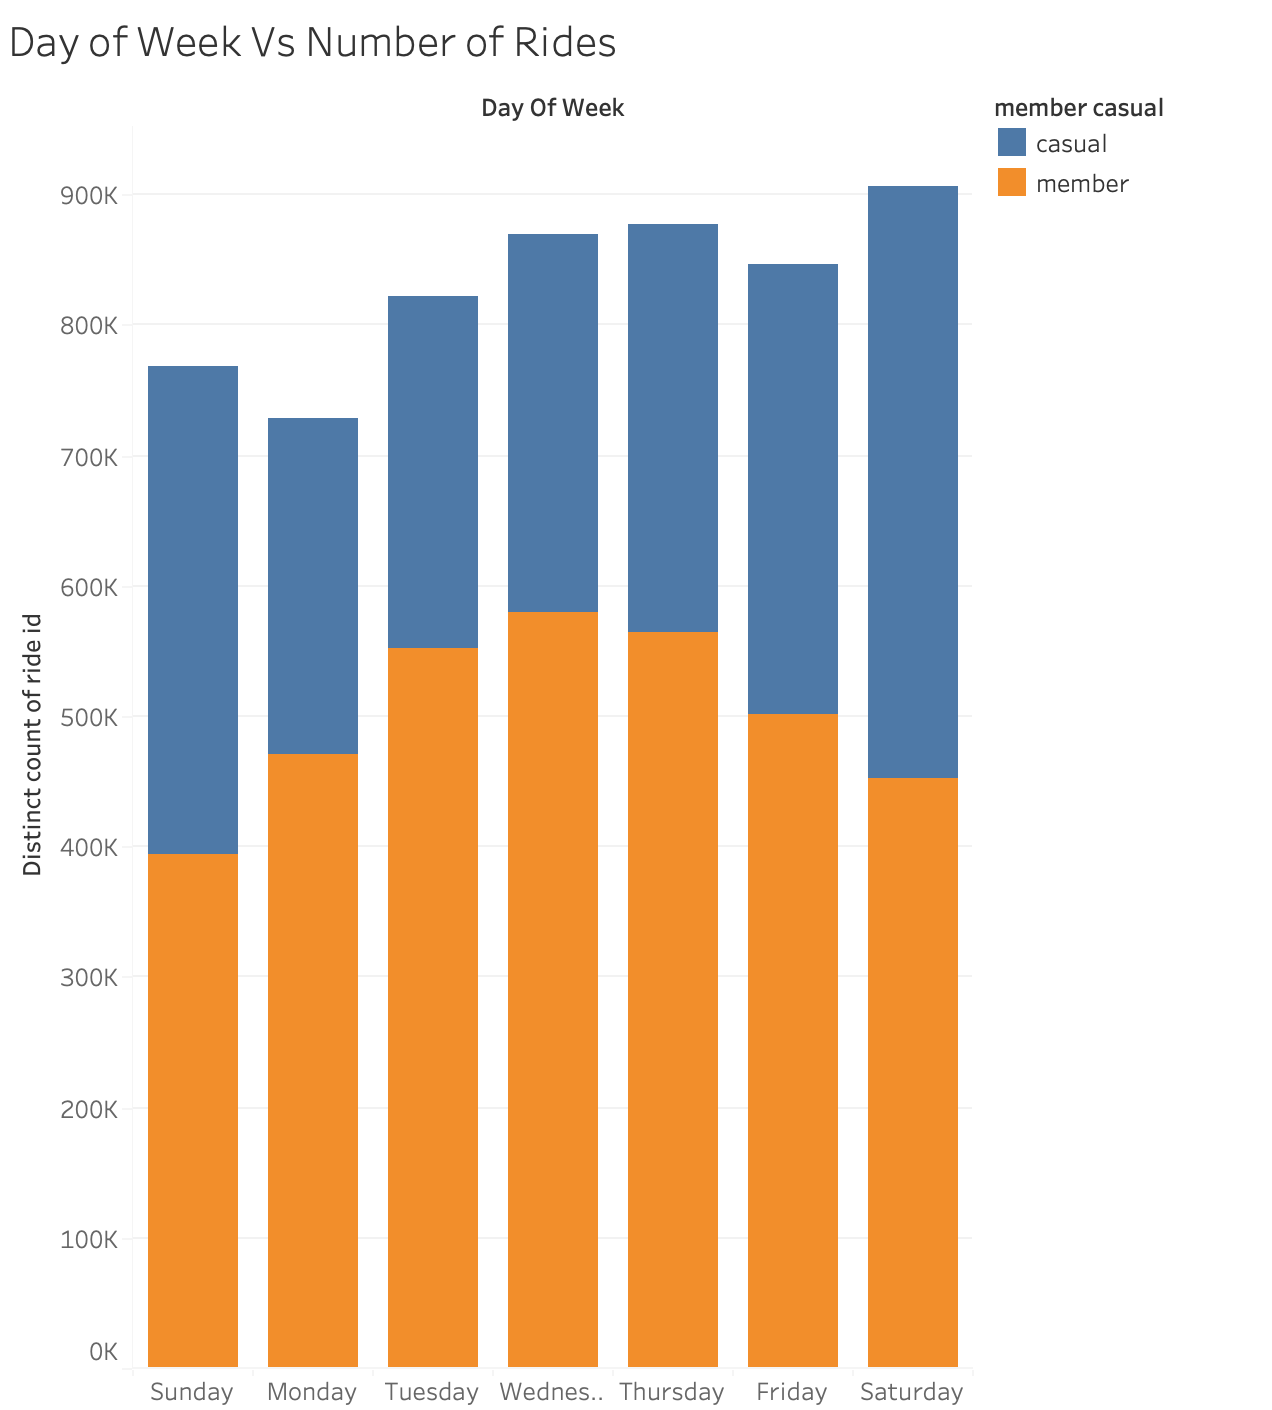


Based on the analysis of the chart, the following observations can be made:

* Annual Members vs. Casual Riders: The chart clearly indicates that there is a higher number of annual members using the bikes compared to casual riders on most days of the week. This suggests that the annual membership base is larger and more actively engaged in bike usage. Annual members may be utilizing the bikes for regular commuting or daily transportation needs.
* Shift in Patterns on Weekends: However, there is a noticeable shift in the pattern on weekends. The chart shows that casual riders tend to use the bikes more on weekends compared to weekdays.

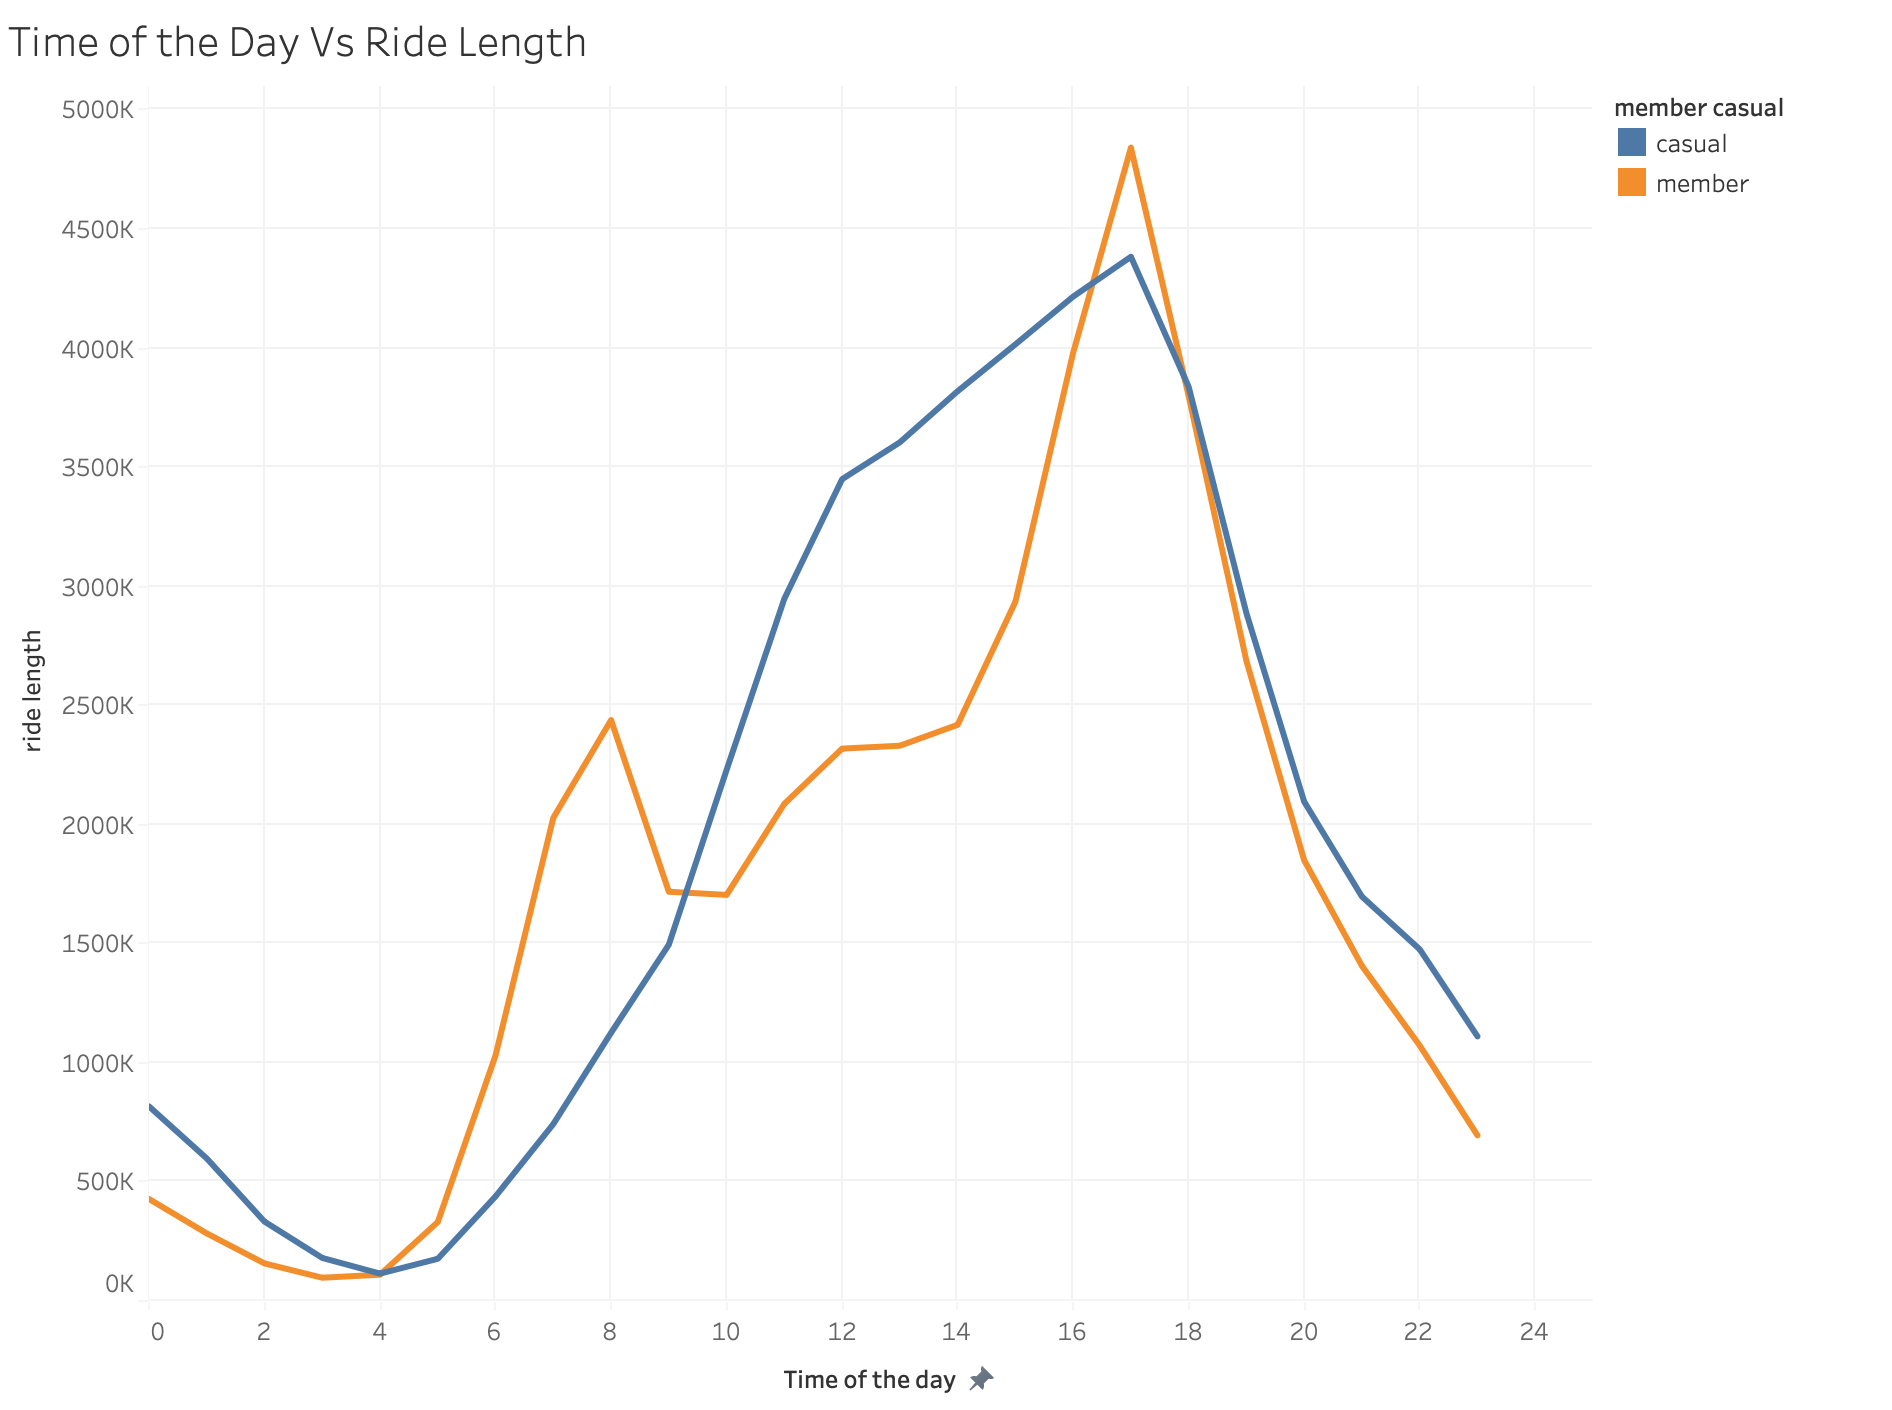

Based on the analysis of the chart, the following observations can be made:

* Distance Traveled: The chart indicates that a significant proportion of riders in the member's group travel shorter distances. This suggests that many annual members use the bikes for shorter trips, such as commuting or short-distance travel. This aligns with the notion that annual members utilize the bikes for regular and routine purposes, such as daily commuting to work or nearby destinations.
* Long-Distance Travel: In contrast, the casual group exhibits a smaller number of riders overall, but a higher proportion of them travel longer distances. This implies that casual riders are more likely to use the bikes for leisure activities or longer journeys, rather than for daily commuting or routine purposes.
* Time of Day: The chart also highlights spikes in bike usage among members around 8 o'clock in the morning and 5 o'clock in the evening. These spikes correspond to typical office hours and commuting times. This observation suggests that the increased bike usage during these hours among members is likely driven by their daily commute or travel to and from the office. It reinforces the notion that annual members primarily use the bikes for work-related purposes and further supports the conclusion that they utilize the bikes as a means of transportation for office-related activities.

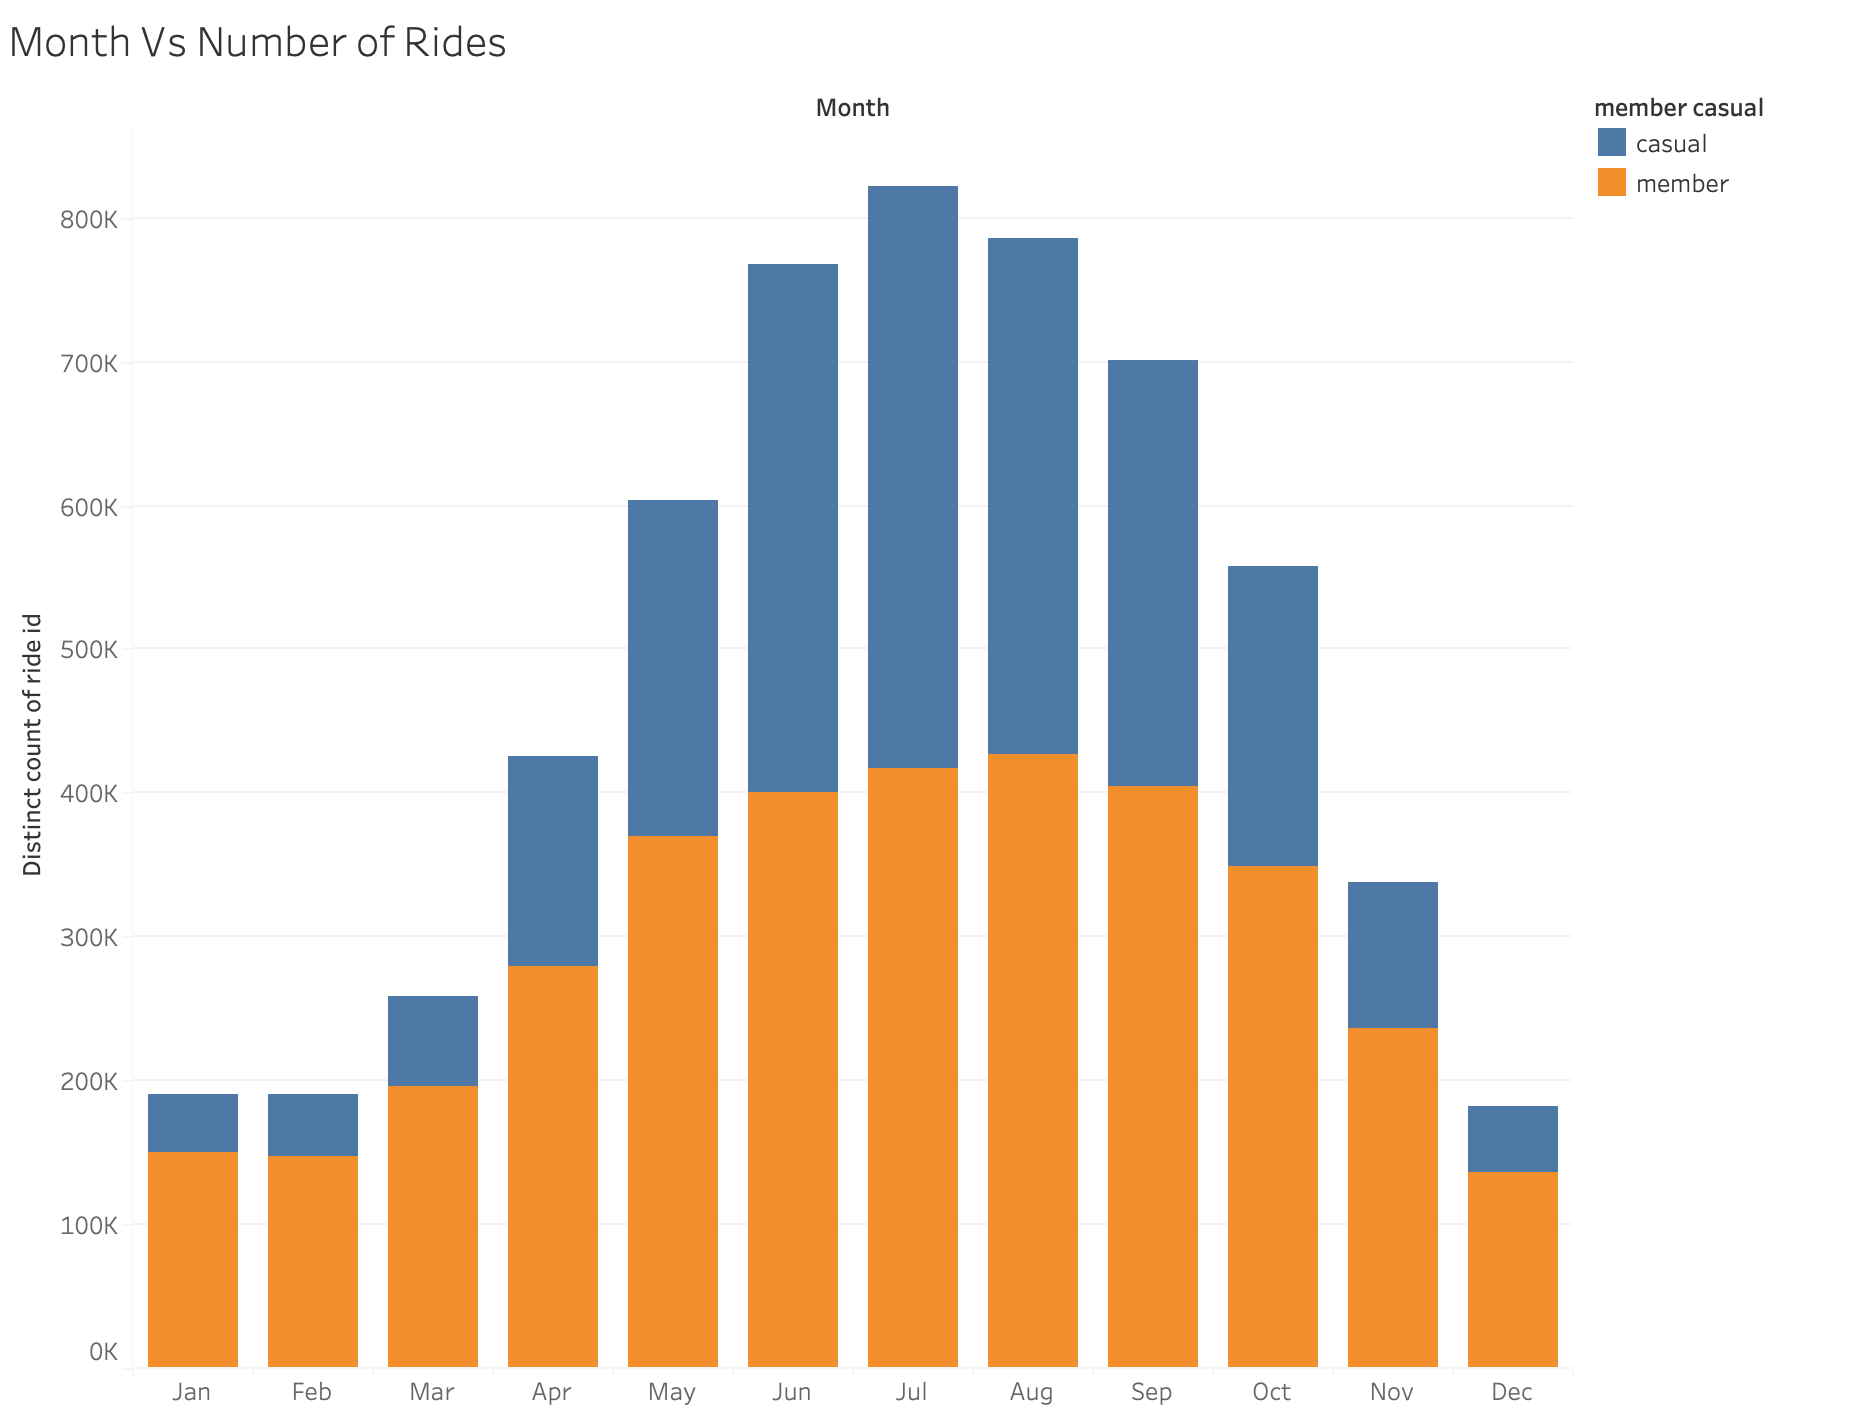

Based on the analysis of the chart, the following observations can be made:

* Seasonal Trend: The chart clearly depicts a noticeable pattern in the number of riders throughout the year. There is a distinct growth in the number of riders from May to October. This indicates that bike usage experiences a surge during these months, suggesting that more people are inclined to ride bikes for various purposes.
* Decline in Other Months: Conversely, the chart shows a decline in the number of riders during the remaining months. This decline can be attributed to various factors, including colder weather, unfavorable riding conditions (such as rain or snow), or reduced outdoor activities during those months.
* Consistency Across Rider Groups: Importantly, this seasonal trend is consistent across both the member and casual rider groups. It indicates that both types of riders exhibit similar patterns in their bike usage, with increased activity during the summer months and decreased usage during other times of the year. This suggests that seasonality plays a significant role in influencing bike usage patterns for both annual members and casual riders.

# **Act**

Based on the analysis conducted, I would recommend the following actions for Cyclistic to optimize their marketing strategies and convert casual riders into annual members:

1. Weekend Promotions: Since casual riders tend to use the bikes more on weekends, create targeted promotions or incentives for weekend usage. Offer discounted rates or special deals for weekend bike rentals to encourage casual riders to use the bikes more frequently.
1. Flexible Membership Options: Introduce flexible membership options that cater to the needs and preferences of casual riders. For example, consider offering short-term or part-time membership plans that provide more flexibility and are tailored to individuals who use the bikes occasionally or for specific purposes.
1. Personalized Offers: Provide customized offers and incentives to casual riders to encourage them to upgrade to an annual membership. This could include discounted membership rates, bonus ride credits, or exclusive perks for annual members.
1. Education and Awareness: Educate casual riders about the advantages of becoming an annual member. Highlight the cost savings, unlimited ride options, priority bike access during peak hours, and other benefits that annual members enjoy. Use targeted marketing campaigns and informative materials to create awareness and showcase the value proposition of an annual membership.
1. Referral Program: Implement a referral program where current annual members can refer casual riders to join as members. Offer incentives such as ride credits or discounts to the referring and new members. This encourages casual riders to consider upgrading and leverages the power of word-of-mouth marketing.